In [ ]:
!pip install geopandas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [6]:
%matplotlib inline

import pandas as pd
import geopandas

In [ ]:
# import modulo os e installazione di rtree e altro per far funzionare l'sjoin
import os
!pip install rtree
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz
os.chdir("/content/spatialindex-src-1.8.5")
!./configure
!make
!make install
!ldconfig

In [7]:
quartieri = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Geopandas Esercizi/File.ZIP/ds964_nil_wm.zip")
quartieri

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
0,48,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8723.368714,2.406306e+06,89,"POLYGON ((9.15422 45.43775, 9.15419 45.43707, ..."
1,64,TRENNO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3309.998800,4.896921e+05,90,"POLYGON ((9.10623 45.49016, 9.10295 45.48939, ..."
2,67,PORTELLO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3800.750663,9.096022e+05,91,"POLYGON ((9.15636 45.48785, 9.15724 45.48721, ..."
3,81,BOVISASCA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7105.469715,1.578028e+06,92,"POLYGON ((9.16803 45.52234, 9.16687 45.52027, ..."
4,84,PARCO NORD,05/02/2020,Vigente,Milano 2030 - PGT Approvato,11741.717005,1.532331e+06,93,"POLYGON ((9.20040 45.52848, 9.20055 45.52828, ..."
...,...,...,...,...,...,...,...,...,...
83,68,PAGANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5221.836696,1.289686e+06,172,"POLYGON ((9.17174 45.47619, 9.17150 45.47595, ..."
84,2,BRERA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5461.667196,1.637333e+06,173,"POLYGON ((9.19165 45.46906, 9.19105 45.46843, ..."
85,33,ROGOREDO - SANTA GIULIA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6012.496435,1.200116e+06,174,"POLYGON ((9.24044 45.44427, 9.24084 45.44424, ..."
86,17,ADRIANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,9276.875747,2.433358e+06,175,"POLYGON ((9.26729 45.51234, 9.26701 45.51241, ..."


In [ ]:
percorsi = geopandas.read_file("/content/drive/MyDrive/tpl_percorsi.geojson")
percorsi

,linea,mezzo,percorso,verso,nome,tipo_perc,lung_km,num_ferm,geometry
0,1,TRAM,12560,Di,Roserio - Greco,Canonico,13.82,48,"LINESTRING (9.11976 45.51743, 9.11987 45.51742..."
1,1,TRAM,9457,As,Greco - Roserio,Canonico,13.97,47,"LINESTRING (9.21625 45.49493, 9.21538 45.49486..."
2,10,TRAM,10930,As,Lunigiana - 24 Maggio (LAV. MONUMENTALE),Canonico,10.12,35,"LINESTRING (9.20557 45.49136, 9.20555 45.49137..."
3,10,TRAM,10933,Di,24 Maggio - Lunigiana (LAV. MONUMENTALE),Canonico,9.99,35,"LINESTRING (9.17930 45.45195, 9.17931 45.45195..."
4,115,BUS,10025,As,Gratosoglio - P.za Diaz,Canonico,7.35,21,"LINESTRING (9.17375 45.40309, 9.17381 45.40305..."
...,...,...,...,...,...,...,...,...,...
414,965,BUS,7613,None,Milano - Pioltello,Canonico,11.36,16,"LINESTRING (9.21957 45.48438, 9.21998 45.48436..."
415,98,BUS,7814,Di,Lotto M1 M5 - Famagosta M2,Canonico,8.26,23,"LINESTRING (9.14160 45.47964, 9.14166 45.47953..."
416,98,BUS,9899,As,Famagosta M2 - Lotto M1 M5,Canonico,7.86,23,"LINESTRING (9.16884 45.43677, 9.16884 45.43673..."
417,99,BUS,11652,None,Noverasco - Vigentino,Canonico,3.90,7,"LINESTRING (9.21222 45.39490, 9.21216 45.39514..."


In [ ]:
fermate = geopandas.read_file("/content/drive/MyDrive/tpl_fermate.geojson")
fermate

,id_amat,ubicazione,linee,geometry
0,10001,"Via Matteotti, 19 prima di Via Cavour",89,POINT (9.14099 45.53151)
1,10002,"Via Cavour, 32/e dopo Via Morandi (ACI)",89,POINT (9.14446 45.53231)
2,10003,"Via Bovisasca, 18 dopo Via C.Battisti",89,POINT (9.14826 45.52691)
3,10008,"Via Bovisasca, 15/A prima di Via Baracca",89,POINT (9.14845 45.52675)
4,10009,Via Rimembranze prima di Via Cornicione,89,POINT (9.14378 45.53003)
...,...,...,...,...
4728,19891,Besta,35,POINT (9.16428 45.51895)
4729,19892,Besta,35,POINT (9.16465 45.51918)
4730,19903,Mascagni,"54,61",POINT (9.20218 45.46604)
4731,19908,Durando,82,POINT (9.16313 45.50649)


SCRIVERE UN NOTEBOOK CHE PERMETTA AD UN UTENTE DI VISUALIZZARE SU UNA MAPPA DI MILANO IL PERCORSO DI UNA LINEA DEI MEZZI DI TRASPORTO. 
L'UTENTE INSERISCE IL NUMERO DELLA LINEA E IL PROGRAMMA NE VISUALIZZA IL PERCORSO.

In [ ]:
!pip install contextily
import contextily

Inserisci il numero di una linea: 5


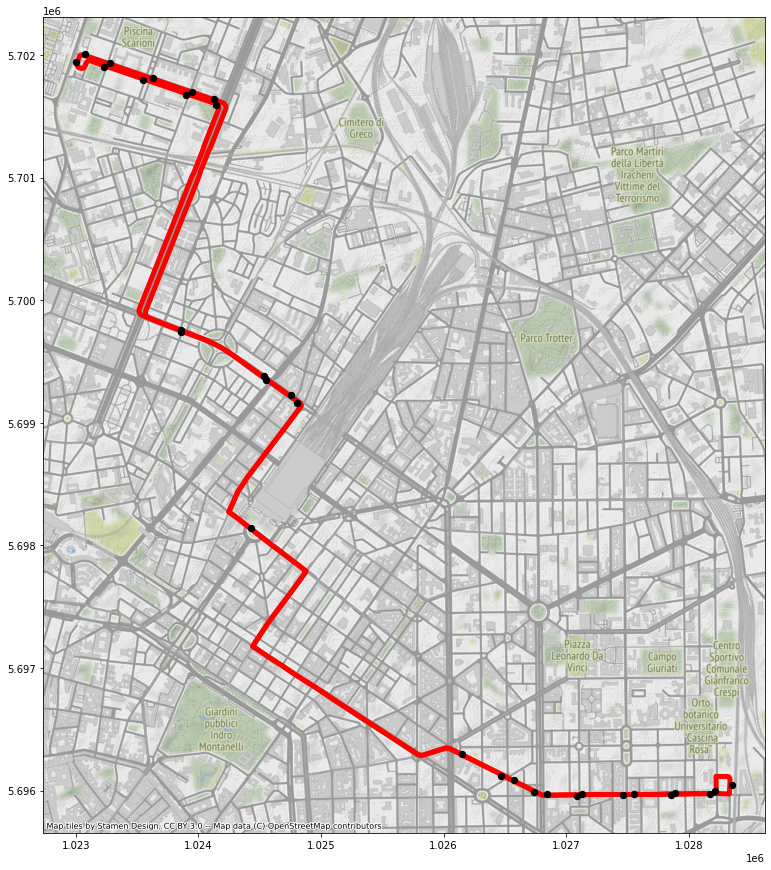

In [ ]:
linea_input = input("Inserisci il numero di una linea: ")

if linea_input in list(percorsi.linea):

  linea= percorsi[percorsi["linea"] == linea_input]
  fermata=fermate[fermate["linee"] == linea_input]
  #ax = quartieri.to_crs(epsg=3857).plot(figsize=(15,15), alpha= 0.5, edgecolor= "k", linewidth= 2,facecolor="none")
  ax= linea.to_crs(epsg=3857).plot(figsize=(15,15), color= "r", linewidth= 5,zorder=1) 
  fermata.to_crs(epsg=3857).plot(ax=ax, color= "k",markersize=40,zorder=2)
  contextily.add_basemap(ax)
else:
  print("la linea da te inserito non è presente all'inetrno del geodataframe")

In [ ]:
fermate

,id_amat,ubicazione,linee,geometry
0,10001,"Via Matteotti, 19 prima di Via Cavour",89,POINT (9.14099 45.53151)
1,10002,"Via Cavour, 32/e dopo Via Morandi (ACI)",89,POINT (9.14446 45.53231)
2,10003,"Via Bovisasca, 18 dopo Via C.Battisti",89,POINT (9.14826 45.52691)
3,10008,"Via Bovisasca, 15/A prima di Via Baracca",89,POINT (9.14845 45.52675)
4,10009,Via Rimembranze prima di Via Cornicione,89,POINT (9.14378 45.53003)
...,...,...,...,...
4728,19891,Besta,35,POINT (9.16428 45.51895)
4729,19892,Besta,35,POINT (9.16465 45.51918)
4730,19903,Mascagni,"54,61",POINT (9.20218 45.46604)
4731,19908,Durando,82,POINT (9.16313 45.50649)


In [ ]:
fermate_copy=fermate.copy()
fermate_copy

,id_amat,ubicazione,linee,geometry
0,10001,"Via Matteotti, 19 prima di Via Cavour",89,POINT (9.14099 45.53151)
1,10002,"Via Cavour, 32/e dopo Via Morandi (ACI)",89,POINT (9.14446 45.53231)
2,10003,"Via Bovisasca, 18 dopo Via C.Battisti",89,POINT (9.14826 45.52691)
3,10008,"Via Bovisasca, 15/A prima di Via Baracca",89,POINT (9.14845 45.52675)
4,10009,Via Rimembranze prima di Via Cornicione,89,POINT (9.14378 45.53003)
...,...,...,...,...
4728,19891,Besta,35,POINT (9.16428 45.51895)
4729,19892,Besta,35,POINT (9.16465 45.51918)
4730,19903,Mascagni,"54,61",POINT (9.20218 45.46604)
4731,19908,Durando,82,POINT (9.16313 45.50649)


In [ ]:
via_input = input("Inserisci il nome di una via: ")

aa= fermate_copy[fermate_copy["ubicazione"].str.contains(via_input)]
aa["linee"]=aa.linee.str.split(",")
dfFin=aa.explode('linee')
print("le linee disponibili nella via "+via_input+ " sono:",str(len(dfFin["linee"].unique())),dfFin["linee"].unique())


Inserisci il nome di una via: Goldoni
le linee disponibili nella via Goldoni sono: 2 ['327' '130']


/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
